In [68]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [69]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36 Edg/91.0.864.59",
    "Accept-Encoding": "gzip, deflate",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
    "DNT": "1",
    "Connection": "close",
    "Upgrade-Insecure-Requests": "1"
}


In [70]:
url = 'https://www.amazon.in/s?k=body+lotion&crid=N0IJISZDUVCX&sprefix=body+%2Caps%2C223&ref=nb_sb_ss_ts-doa-p_2_5'

In [71]:
response = requests.get(url, headers=headers)

In [72]:
response

<Response [200]>

In [73]:
soup = BeautifulSoup(response.content, 'html.parser')

In [74]:
soup

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://completion.amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://completion.amazon.com" rel="preconnect"/>
<!-- sp:end-feature:cs-optimization -->
<!--

In [75]:
# product_names = []
# quantities = []
brands = []
mrps = []
units_sold = []

In [76]:
product_containers = soup.find_all('div', {'class': 's-result-item'})


In [77]:
for container in product_containers:
# Extract product name
#     product_name = container.find('span', {'class': 'a-text-normal'})
#     if product_name:
#         product_names.append(product_name.text.strip())
#     else:
#         product_names.append(None)

# Extract quantity
#     quantity = container.find('span', {'class': 'a-size-base'})
#     if quantity:
#         quantities.append(quantity.text.strip())
#     else:
#         quantities.append(None)

# Extract brand
    brand = container.find('span', {'class': 'a-size-base-plus'})
    if brand:
        brands.append(brand.text.strip())
    else:
        brands.append(None)

# Extract MRP
    mrp = container.find('span', {'class': 'a-offscreen'})
    if mrp:
        mrps.append(mrp.text.strip())
    else:
        mrps.append(None)

# Extract units sold (if available)
    units = container.find('div', {'class': 'a-section a-spacing-none a-spacing-top-micro'})
    if units:
        units_sold.append(units.text.strip())
    else:
        units_sold.append(None)


In [78]:
data = {
#     'Product Name': product_names,
#     'Quantity': quantities,
    'Brand': brands,
    'MRP': mrps,
    'Units Sold': units_sold
}

df = pd.DataFrame(data)

In [79]:
df.head()

,Brand,MRP,Units Sold
0,Get Visibly Brighter Skin From The Very First Use,None,None
1,None,None,None
2,Plum BodyLovin' Vanilla Caramello Body Lotion ...,₹380,4.3 out of 5 stars 64 1K+ bought in past month
3,Joy Honey & Almonds Advanced Nourishing Body L...,₹233,"4.2 out of 5 stars 9,818"
4,"Vaseline Gluta-Hya Dewy Radiance, 200ml, Serum...",₹225,"4.1 out of 5 stars 1,893"


In [80]:
# df['Product Name'].unique()
df['Brand'].unique()

array(['Get Visibly Brighter Skin From The Very First Use', None,
       "Plum BodyLovin' Vanilla Caramello Body Lotion | Cocoa Butter & Vitamin B5 For Deep Moisturization| Non-Greasy | Soft & Glowing Skin| For Dry to Very Dry Skin | Warm & Cozy Vanilla Fragrance (400 ml)",
       'Joy Honey & Almonds Advanced Nourishing Body Lotion For Winters (500ml) | Non Sticky Body Moisturizer With Vitamin E For Dry Skin',
       'Vaseline Gluta-Hya Dewy Radiance, 200ml, Serum-In-Lotion, Boosted With GlutaGlow, for Visibly Brighter Skin from 1st Use',
       'Wow Skin Science Shea Butter With Lactic Acid Body Lotion 400ml',
       'Parachute Advansed Soft Touch Body Lotion for Women & Men, All Skin types, 400ml | Pure Coconut Milk & Honey, 100% Natural, 72h Moisturisation',
       'NIVEA Nourishing Body Milk 600ml Body Lotion | 48 H Moisturization | With 2X Almond Oil | Smooth and Healthy Looking Skin |For Very Dry Skin',
       'Parachute Advansed Deep Nourish Body Lotion for Women & Men, Dry Ski

In [81]:
df['Brand_Name']=df['Brand'].str.split().str[0]

In [82]:
df

,Brand,MRP,Units Sold,Brand_Name
0,Get Visibly Brighter Skin From The Very First Use,None,None,Get
1,None,None,None,None
2,Plum BodyLovin' Vanilla Caramello Body Lotion ...,₹380,4.3 out of 5 stars 64 1K+ bought in past month,Plum
3,Joy Honey & Almonds Advanced Nourishing Body L...,₹233,"4.2 out of 5 stars 9,818",Joy
4,"Vaseline Gluta-Hya Dewy Radiance, 200ml, Serum...",₹225,"4.1 out of 5 stars 1,893",Vaseline
...,...,...,...,...
70,None,None,None,None
71,None,None,None,None
72,None,None,None,None
73,None,None,None,None


In [83]:
df['Brand'].str.split(" ").str[3].unique()

array(['Skin', None, 'Caramello', 'Almonds', 'Radiance,', 'Shea', 'Touch',
       'Milk', 'Nourish', 'Butter', 'Provides', 'Sun', 'Deep', 'Lotion,',
       '400ml', 'Body', 'Natural', 'Planet', 'Repair', 'Cocoa', 'Glow,',
       'Flawless', 'Choco', 'AHA', 'Barrier', 'Serum', 'Cucumber',
       'Nourishing', 'Lotion', 'Supple', 'Aloe', 'Advanced', '+',
       'Brightening', 'Moisturizer', 'Lavender', 'Rose', 'Oatmeal',
       'Collagen', 'LOTION', 'Daily'], dtype=object)

In [84]:
import re

pattern = r'(\d+)\s*ml'
quantities_ml = []

for row in df['Brand']:
    if row is not None:  # Add a check to skip None values
        # Search for the pattern in the brand name
        match = re.search(pattern, str(row))  # Convert to string before applying regex
        if match:
            # Extract the matched quantity and convert it to an integer
            quantity_ml = int(match.group(1))
            quantities_ml.append(quantity_ml)
        else:
            # If no match is found, append None
            quantities_ml.append(None)
    else:
        # If the value is None, append None
        quantities_ml.append(None)

# Add the extracted quantities as a new column to the DataFrame
df['Quantity (ml)'] = quantities_ml

# Display the DataFrame
print(df)


                                                Brand   MRP  \
0   Get Visibly Brighter Skin From The Very First Use  None   
1                                                None  None   
2   Plum BodyLovin' Vanilla Caramello Body Lotion ...  ₹380   
3   Joy Honey & Almonds Advanced Nourishing Body L...  ₹233   
4   Vaseline Gluta-Hya Dewy Radiance, 200ml, Serum...  ₹225   
..                                                ...   ...   
70                                               None  None   
71                                               None  None   
72                                               None  None   
73                                               None  None   
74                                               None  None   

                                         Units Sold Brand_Name  Quantity (ml)  
0                                              None        Get            NaN  
1                                              None       None            NaN  
2  

In [85]:
df

,Brand,MRP,Units Sold,Brand_Name,Quantity (ml)
0,Get Visibly Brighter Skin From The Very First Use,None,None,Get,NaN
1,None,None,None,None,NaN
2,Plum BodyLovin' Vanilla Caramello Body Lotion ...,₹380,4.3 out of 5 stars 64 1K+ bought in past month,Plum,400.0
3,Joy Honey & Almonds Advanced Nourishing Body L...,₹233,"4.2 out of 5 stars 9,818",Joy,500.0
4,"Vaseline Gluta-Hya Dewy Radiance, 200ml, Serum...",₹225,"4.1 out of 5 stars 1,893",Vaseline,200.0
...,...,...,...,...,...
70,None,None,None,None,NaN
71,None,None,None,None,NaN
72,None,None,None,None,NaN
73,None,None,None,None,NaN


In [86]:
df['Units']=df['Units Sold'].str.split(" ").str[7]

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          66 non-null     object 
 1   MRP            66 non-null     object 
 2   Units Sold     66 non-null     object 
 3   Brand_Name     66 non-null     object 
 4   Quantity (ml)  59 non-null     float64
 5   Units          56 non-null     object 
dtypes: float64(1), object(5)
memory usage: 3.6+ KB


In [88]:
numeric_units_df = df[df['Units'].str.contains(r'^\d+K?\+$', na=False)]
numeric_units_df['Units'] = numeric_units_df['Units'].str.replace('K+', '000').str.replace('+', '').astype(float)


C:\Users\DeepakKumarTiwary\AppData\Local\Temp\ipykernel_22668\381805515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_units_df['Units'] = numeric_units_df['Units'].str.replace('K+', '000').str.replace('+', '').astype(float)


In [89]:
filtered_df = numeric_units_df[numeric_units_df['Units'] >= 1000]

In [90]:
filtered_df['MRP'] = filtered_df['MRP'].str.replace('₹', '').astype(float)

C:\Users\DeepakKumarTiwary\AppData\Local\Temp\ipykernel_22668\861334972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['MRP'] = filtered_df['MRP'].str.replace('₹', '').astype(float)


In [91]:
filtered_df['Value']=filtered_df['Units']*filtered_df['MRP']

C:\Users\DeepakKumarTiwary\AppData\Local\Temp\ipykernel_22668\277536588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Value']=filtered_df['Units']*filtered_df['MRP']


In [92]:
filtered_df

,Brand,MRP,Units Sold,Brand_Name,Quantity (ml),Units,Value
2,Plum BodyLovin' Vanilla Caramello Body Lotion ...,380.0,4.3 out of 5 stars 64 1K+ bought in past month,Plum,400.0,1000.0,380000.0
5,Wow Skin Science Shea Butter With Lactic Acid ...,223.0,"4.0 out of 5 stars 15,219 1K+ bought in past ...",Wow,400.0,1000.0,223000.0
6,Parachute Advansed Soft Touch Body Lotion for ...,142.0,"4.1 out of 5 stars 22,040 8K+ bought in past ...",Parachute,400.0,8000.0,1136000.0
7,NIVEA Nourishing Body Milk 600ml Body Lotion |...,344.0,"4.4 out of 5 stars 42,993 10K+ bought in past...",NIVEA,600.0,10000.0,3440000.0
8,Parachute Advansed Deep Nourish Body Lotion fo...,150.0,"4.2 out of 5 stars 50,735 7K+ bought in past ...",Parachute,400.0,7000.0,1050000.0
11,Himalaya Herbals Cocoa Butter Intensive Body L...,198.0,"4.3 out of 5 stars 27,858 6K+ bought in past ...",Himalaya,400.0,6000.0,1188000.0
12,Boroplus Body Lotion Provides 24Hrs Moisturisa...,159.0,"4.2 out of 5 stars 33,922 6K+ bought in past ...",Boroplus,NaN,6000.0,954000.0
14,VLCC Almond Honey Deep Nourishing & Skin Brigh...,240.0,"4.2 out of 5 stars 22,575 7K+ bought in past ...",VLCC,350.0,7000.0,1680000.0
15,"Himalaya Nourishing Body Lotion, 400ml",204.0,"4.3 out of 5 stars 6,248 5K+ bought in past m...",Himalaya,400.0,5000.0,1020000.0
16,NIVEA Cocoa Nourish 400ml Body Lotion with Dee...,275.0,"4.5 out of 5 stars 27,202 10K+ bought in past...",NIVEA,400.0,10000.0,2750000.0


In [93]:
filtered_df.to_excel('Lotion_data.xlsx')

In [94]:
filtered_df['Value'].sum()

31211000.0

In [95]:
lotion=filtered_df.groupby(['Brand','Brand_Name']).agg({'Value':'sum'}).sort_values(by='Value',ascending=False).reset_index()

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

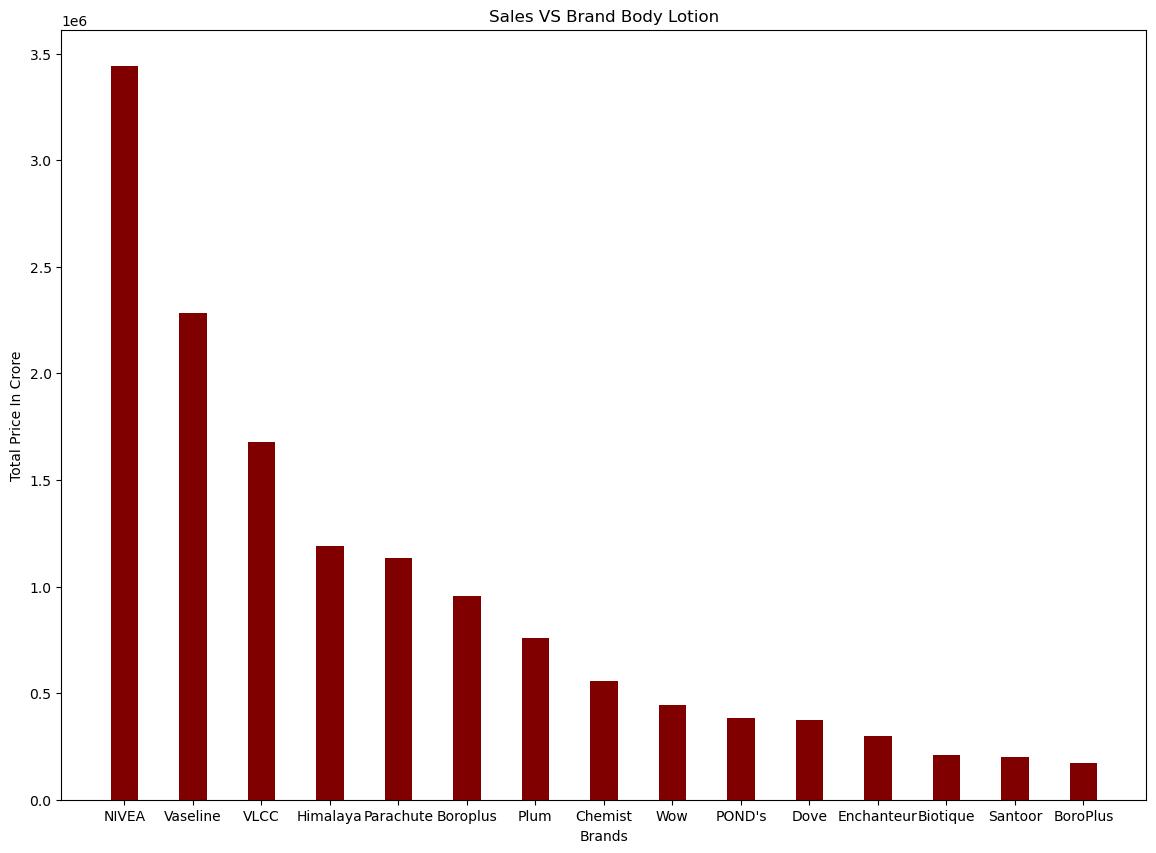

In [97]:
fig = plt.figure(figsize = (14, 10))
 
# creating the bar plot
plt.bar(lotion['Brand_Name'], lotion['Value'], color ='maroon', 
        width = 0.4)
 
plt.xlabel("Brands")
plt.ylabel("Total Price In Crore")
plt.title("Sales VS Brand Body Lotion")
plt.show()

# SUNSCREEN

In [98]:
header = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36 Edg/91.0.864.59",
    "Accept-Encoding": "gzip, deflate",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
    "DNT": "1",
    "Connection": "close",
    "Upgrade-Insecure-Requests": "1"
}


In [99]:
url_1= 'https://www.amazon.in/s?k=sunscreen&crid=1D9HXHNOVK9BY&sprefix=sunscreen%2Caps%2C220&ref=nb_sb_noss_2'

In [100]:
response_1 = requests.get(url_1, headers=header)

In [101]:
response_1

<Response [200]>

In [102]:
soup_1 = BeautifulSoup(response_1.content, 'html.parser')

In [103]:
soup_1

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://images-eu.ssl-images-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://m.media-amazon.com" rel="preconnect"/>
<link crossorigin="" href="https://completion.amazon.com" rel="dns-prefetch"/>
<link crossorigin="" href="https://completion.amazon.com" rel="preconnect"/>
<!-- sp:end-feature:cs-optimization -->
<!--

In [104]:
brands_1 = []
mrps_1 = []
units_sold_1 = []

In [105]:
product_containers_1 = soup_1.find_all('div', {'class': 's-result-item'})


In [106]:
for container in product_containers_1:
# Extract product name
#     product_name = container.find('span', {'class': 'a-text-normal'})
#     if product_name:
#         product_names.append(product_name.text.strip())
#     else:
#         product_names.append(None)

# Extract quantity
#     quantity = container.find('span', {'class': 'a-size-base'})
#     if quantity:
#         quantities.append(quantity.text.strip())
#     else:
#         quantities.append(None)

# Extract brand
    brand = container.find('span', {'class': 'a-size-base-plus'})
    if brand:
        brands_1.append(brand.text.strip())
    else:
        brands_1.append(None)

# Extract MRP
    mrp = container.find('span', {'class': 'a-offscreen'})
    if mrp:
        mrps_1.append(mrp.text.strip())
    else:
        mrps_1.append(None)

# Extract units sold (if available)
    units = container.find('div', {'class': 'a-section a-spacing-none a-spacing-top-micro'})
    if units:
        units_sold_1.append(units.text.strip())
    else:
        units_sold_1.append(None)


In [107]:
data_1 = {
#     'Product Name': product_names,
#     'Quantity': quantities,
    'Brand': brands_1,
    'MRP': mrps_1,
    'Units Sold': units_sold_1
}

df_1 = pd.DataFrame(data_1)

In [108]:
df_1

,Brand,MRP,Units Sold
0,Shop,None,None
1,None,None,None
2,DOT & KEY Vitamin C + E Super Bright Sunscreen...,₹382,"4.3 out of 5 stars 2,986 10K+ bought in past ..."
3,Aqualogica Glow+ Dewy Sunscreen SPF 50 PA++++ ...,₹367,"4.3 out of 5 stars 11,419 20K+ bought in past..."
4,The Derma Co Hyaluronic Sunscreen Aqua Ultra L...,₹418,"4.3 out of 5 stars 15,441 20K+ bought in past..."
...,...,...,...
75,None,None,None
76,None,None,None
77,None,None,None
78,None,None,None


In [109]:
df_1.head()

,Brand,MRP,Units Sold
0,Shop,None,None
1,None,None,None
2,DOT & KEY Vitamin C + E Super Bright Sunscreen...,₹382,"4.3 out of 5 stars 2,986 10K+ bought in past ..."
3,Aqualogica Glow+ Dewy Sunscreen SPF 50 PA++++ ...,₹367,"4.3 out of 5 stars 11,419 20K+ bought in past..."
4,The Derma Co Hyaluronic Sunscreen Aqua Ultra L...,₹418,"4.3 out of 5 stars 15,441 20K+ bought in past..."


In [110]:
df_1['Brand'].unique()

array(['Shop', None,
       'DOT & KEY Vitamin C + E Super Bright Sunscreen Spf 50|Water-Light,UVA/UVB & Blue Light Protection|For Even Toned & Glowing Skin|With Liquid Spf 50+++|No White Cast,|For All Skin Types|50G,Pack Of 1',
       'Aqualogica Glow+ Dewy Sunscreen SPF 50 PA++++ | UVA/B & Blue Light Protection for Men & Women | Oily, Dry, Sensitive & Combination Skin | Fragrance-Free | 50g',
       'The Derma Co Hyaluronic Sunscreen Aqua Ultra Light Gel With Spf 50 Pa++++ For Broad Spectrum, UV A, UV B & Blue Light Protection For Oily Skin - 50G(Dermaco), Pack Of 1',
       'Plum Cica & Hyaluronic Acid Aqua-Light Sunscreen SPF 50 PA+++ | No White Cast, Lightweight, Non-Sticky | Safe, New Generation UV Filters | Dermat-Tested | Blue Light Protection | Sunscreen For Women & Men | 100% Vegan | 50 g',
       'Minimalist Sunscreen SPF 50 PA++++ | Clinically Tested in US (In-Vivo) | Lightweight with Multi-Vitamins | No White Cast | Broad Spectrum | For Women & Men | 50g',
       'The Derm

In [111]:
df_1['Brand_Name']=df_1['Brand'].str.split().str[0]

In [112]:
df_1

,Brand,MRP,Units Sold,Brand_Name
0,Shop,None,None,Shop
1,None,None,None,None
2,DOT & KEY Vitamin C + E Super Bright Sunscreen...,₹382,"4.3 out of 5 stars 2,986 10K+ bought in past ...",DOT
3,Aqualogica Glow+ Dewy Sunscreen SPF 50 PA++++ ...,₹367,"4.3 out of 5 stars 11,419 20K+ bought in past...",Aqualogica
4,The Derma Co Hyaluronic Sunscreen Aqua Ultra L...,₹418,"4.3 out of 5 stars 15,441 20K+ bought in past...",The
...,...,...,...,...
75,None,None,None,None
76,None,None,None,None
77,None,None,None,None
78,None,None,None,None


In [113]:
df_1['Units']=df_1['Units Sold'].str.split().str[6]

In [114]:
df_1['Units']=df_1['Units'].str.replace('K\+', '000', regex=True).str.replace('\+', '', regex=True)

In [115]:
df_1['Units'].unique()

array([None, '10000', '20000', '3000', 'Delivery', '4000', '8000', nan,
       '5000', '1000', '600', '400', '7000', '2000', '700', '500', '6000'],
      dtype=object)

In [116]:
df_1['Units Sold'].unique()

array([None, '4.3 out of 5 stars 2,986  10K+ bought in past month',
       '4.3 out of 5 stars 11,419  20K+ bought in past month',
       '4.3 out of 5 stars 15,441  20K+ bought in past month',
       '4.3 out of 5 stars 204  3K+ bought in past month',
       '4.1 out of 5 stars 17,707  20K+ bought in past month',
       '4.3 out of 5 stars 15,441  10K+ bought in past month',
       '4.1 out of 5 stars 55,619  20K+ bought in past month',
       'Get it by Saturday 6 AprilFREE Delivery over ₹499. Fulfilled by Amazon',
       '4.1 out of 5 stars 19,417  4K+ bought in past month',
       '3.8 out of 5 stars 2,952  10K+ bought in past month',
       '4.2 out of 5 stars 2,015  8K+ bought in past month',
       '4.3 out of 5 stars 2,095  10K+ bought in past month',
       '4.2 out of 5 stars 6,046  10K+ bought in past month',
       '4.4 out of 5 stars 7,042  8K+ bought in past month',
       '4.1 out of 5 stars 55,619',
       '4.3 out of 5 stars 17,468  10K+ bought in past month',
       '

In [117]:
# df_1['Units']=df_1['Un'].str.split().str[1]

In [118]:
# df_1

In [119]:
# df_1['Units']=df_1['Units'].str.replace('K+', '000').str.replace('+', '').astype(float)

In [120]:
df_1['Units'] = pd.to_numeric(df_1['Units'], errors='coerce')
df_1['Units']=df_1['Units'].astype(float)

In [121]:
df_1=df_1[df_1['Units']>=1000]

In [123]:
df_1

,Brand,MRP,Units Sold,Brand_Name,Units
2,DOT & KEY Vitamin C + E Super Bright Sunscreen...,₹382,"4.3 out of 5 stars 2,986 10K+ bought in past ...",DOT,10000.0
3,Aqualogica Glow+ Dewy Sunscreen SPF 50 PA++++ ...,₹367,"4.3 out of 5 stars 11,419 20K+ bought in past...",Aqualogica,20000.0
4,The Derma Co Hyaluronic Sunscreen Aqua Ultra L...,₹418,"4.3 out of 5 stars 15,441 20K+ bought in past...",The,20000.0
5,Plum Cica & Hyaluronic Acid Aqua-Light Sunscre...,₹359,4.3 out of 5 stars 204 3K+ bought in past month,Plum,3000.0
6,Minimalist Sunscreen SPF 50 PA++++ | Clinicall...,₹379,"4.1 out of 5 stars 17,707 20K+ bought in past...",Minimalist,20000.0
7,The Derma Co 1% Hyaluronic Sunscreen SPF 50 Aq...,₹531,"4.3 out of 5 stars 15,441 10K+ bought in past...",The,10000.0
8,Neutrogena Ultra Sheer Sunscreen SPF 50+ | Bro...,₹260,"4.1 out of 5 stars 55,619 20K+ bought in past...",Neutrogena,20000.0
11,Aqualogica Glow+ Dewy Sunscreen SPF 50 PA++++ ...,₹367,"4.3 out of 5 stars 11,419 20K+ bought in past...",Aqualogica,20000.0
12,Biotique Bio Sandalwood Sunscreen Ultra Soothi...,₹265,"4.1 out of 5 stars 19,417 4K+ bought in past ...",Biotique,4000.0
13,Mamaearth Vitamin C Daily Glow Sunscreen For A...,₹359,"3.8 out of 5 stars 2,952 10K+ bought in past ...",Mamaearth,10000.0


In [124]:
df_1['INR'] = df_1['MRP'].str.replace('₹', '').str.replace(',', '').astype(float)


C:\Users\DeepakKumarTiwary\AppData\Local\Temp\ipykernel_22668\422037563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['INR'] = df_1['MRP'].str.replace('₹', '').str.replace(',', '').astype(float)


In [125]:
df_1['Value']=df_1['INR']*df_1['Units']

C:\Users\DeepakKumarTiwary\AppData\Local\Temp\ipykernel_22668\1899514384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Value']=df_1['INR']*df_1['Units']


In [126]:
df_1=df_1.fillna(0)

In [127]:
new={'La':'La Shield','LAKMÉ':'Lakme','DOT':'DOT & KEY ','The':'The Derma Co','Dr.':'Dr. Sheth'}

In [128]:
df_1['Brand_Name']=df_1['Brand_Name'].replace(new,regex=True)

In [129]:
df_1

,Brand,MRP,Units Sold,Brand_Name,Units,INR,Value
2,DOT & KEY Vitamin C + E Super Bright Sunscreen...,₹382,"4.3 out of 5 stars 2,986 10K+ bought in past ...",DOT & KEY,10000.0,382.0,3820000.0
3,Aqualogica Glow+ Dewy Sunscreen SPF 50 PA++++ ...,₹367,"4.3 out of 5 stars 11,419 20K+ bought in past...",Aqualogica,20000.0,367.0,7340000.0
4,The Derma Co Hyaluronic Sunscreen Aqua Ultra L...,₹418,"4.3 out of 5 stars 15,441 20K+ bought in past...",The Derma Co,20000.0,418.0,8360000.0
5,Plum Cica & Hyaluronic Acid Aqua-Light Sunscre...,₹359,4.3 out of 5 stars 204 3K+ bought in past month,Plum,3000.0,359.0,1077000.0
6,Minimalist Sunscreen SPF 50 PA++++ | Clinicall...,₹379,"4.1 out of 5 stars 17,707 20K+ bought in past...",Minimalist,20000.0,379.0,7580000.0
7,The Derma Co 1% Hyaluronic Sunscreen SPF 50 Aq...,₹531,"4.3 out of 5 stars 15,441 10K+ bought in past...",The Derma Co,10000.0,531.0,5310000.0
8,Neutrogena Ultra Sheer Sunscreen SPF 50+ | Bro...,₹260,"4.1 out of 5 stars 55,619 20K+ bought in past...",Neutrogena,20000.0,260.0,5200000.0
11,Aqualogica Glow+ Dewy Sunscreen SPF 50 PA++++ ...,₹367,"4.3 out of 5 stars 11,419 20K+ bought in past...",Aqualogica,20000.0,367.0,7340000.0
12,Biotique Bio Sandalwood Sunscreen Ultra Soothi...,₹265,"4.1 out of 5 stars 19,417 4K+ bought in past ...",Biotique,4000.0,265.0,1060000.0
13,Mamaearth Vitamin C Daily Glow Sunscreen For A...,₹359,"3.8 out of 5 stars 2,952 10K+ bought in past ...",Mamaearth,10000.0,359.0,3590000.0


In [130]:
df_1.to_excel('Sunscreen_data.xlsx')

In [131]:
sunscreen=df_1.groupby(['Brand_Name']).agg({'Value':'sum'}).sort_values(by='Value',ascending=False).reset_index()

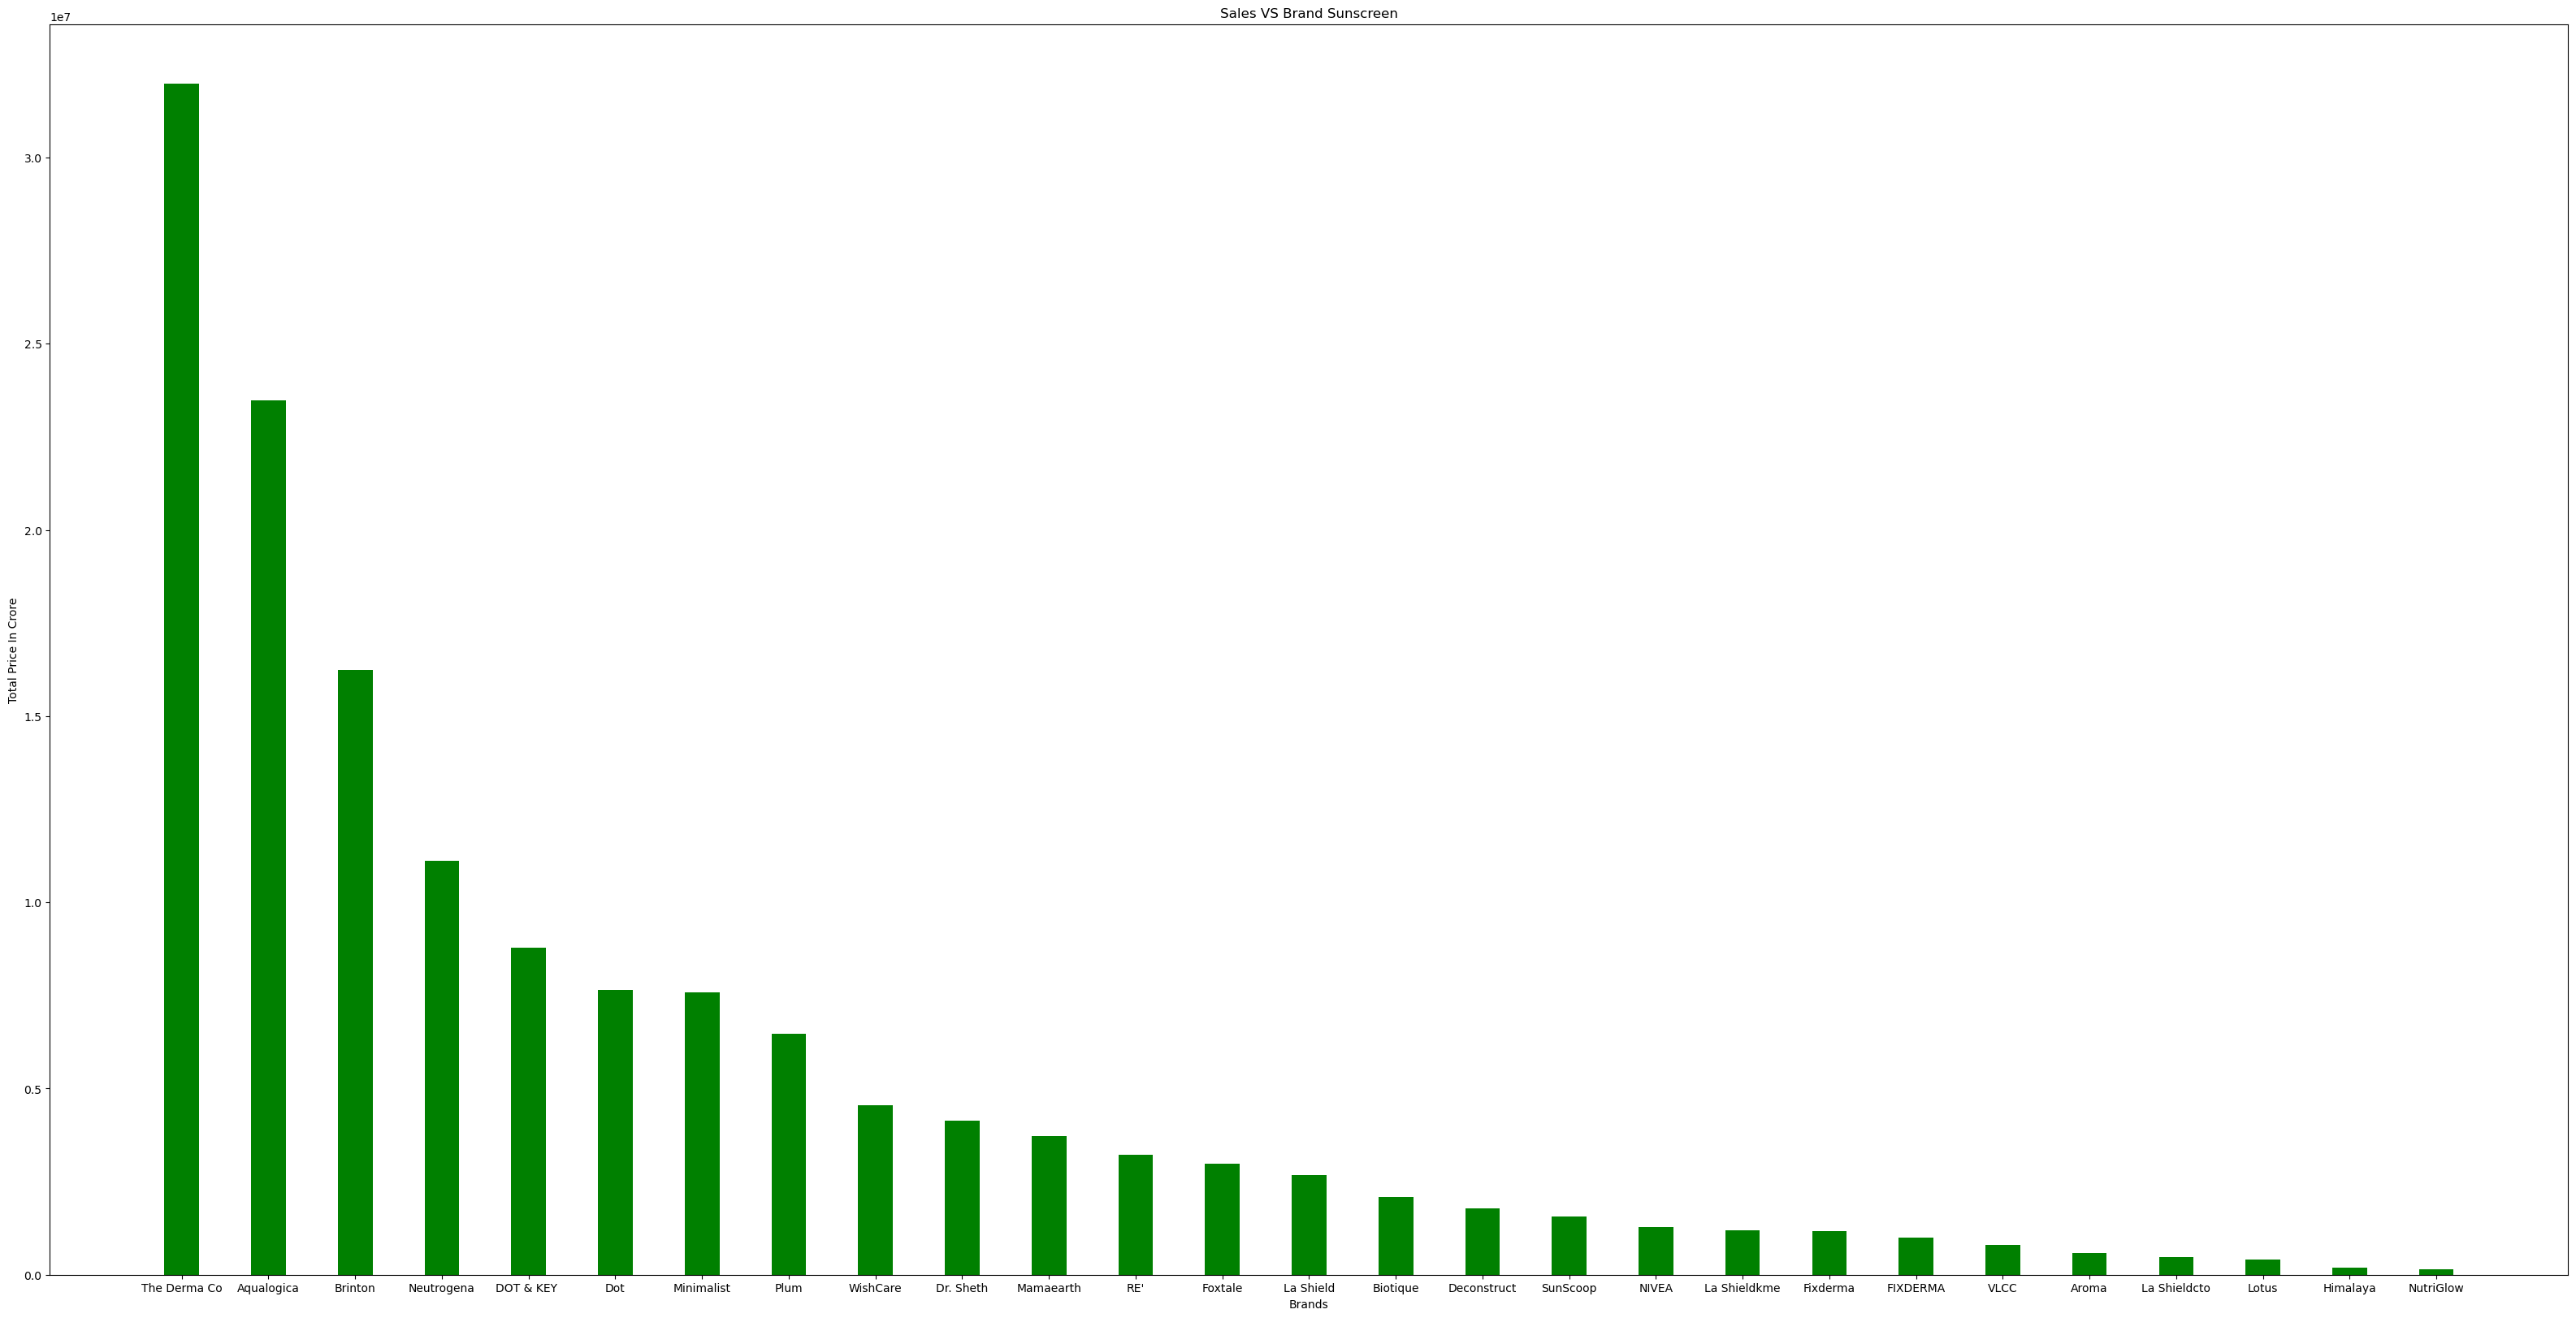

In [132]:
fig = plt.figure(figsize=(40,20))
 
# creating the bar plot
plt.bar(sunscreen['Brand_Name'], sunscreen['Value'], color ='green', 
        width = 0.4)
 
plt.xlabel("Brands")
plt.ylabel("Total Price In Crore")
plt.title("Sales VS Brand Sunscreen")
plt.show()

In [133]:
sunscreen['Value'].sum()

147221000.0

In [134]:
lotion['Value'].sum()

31211000.0

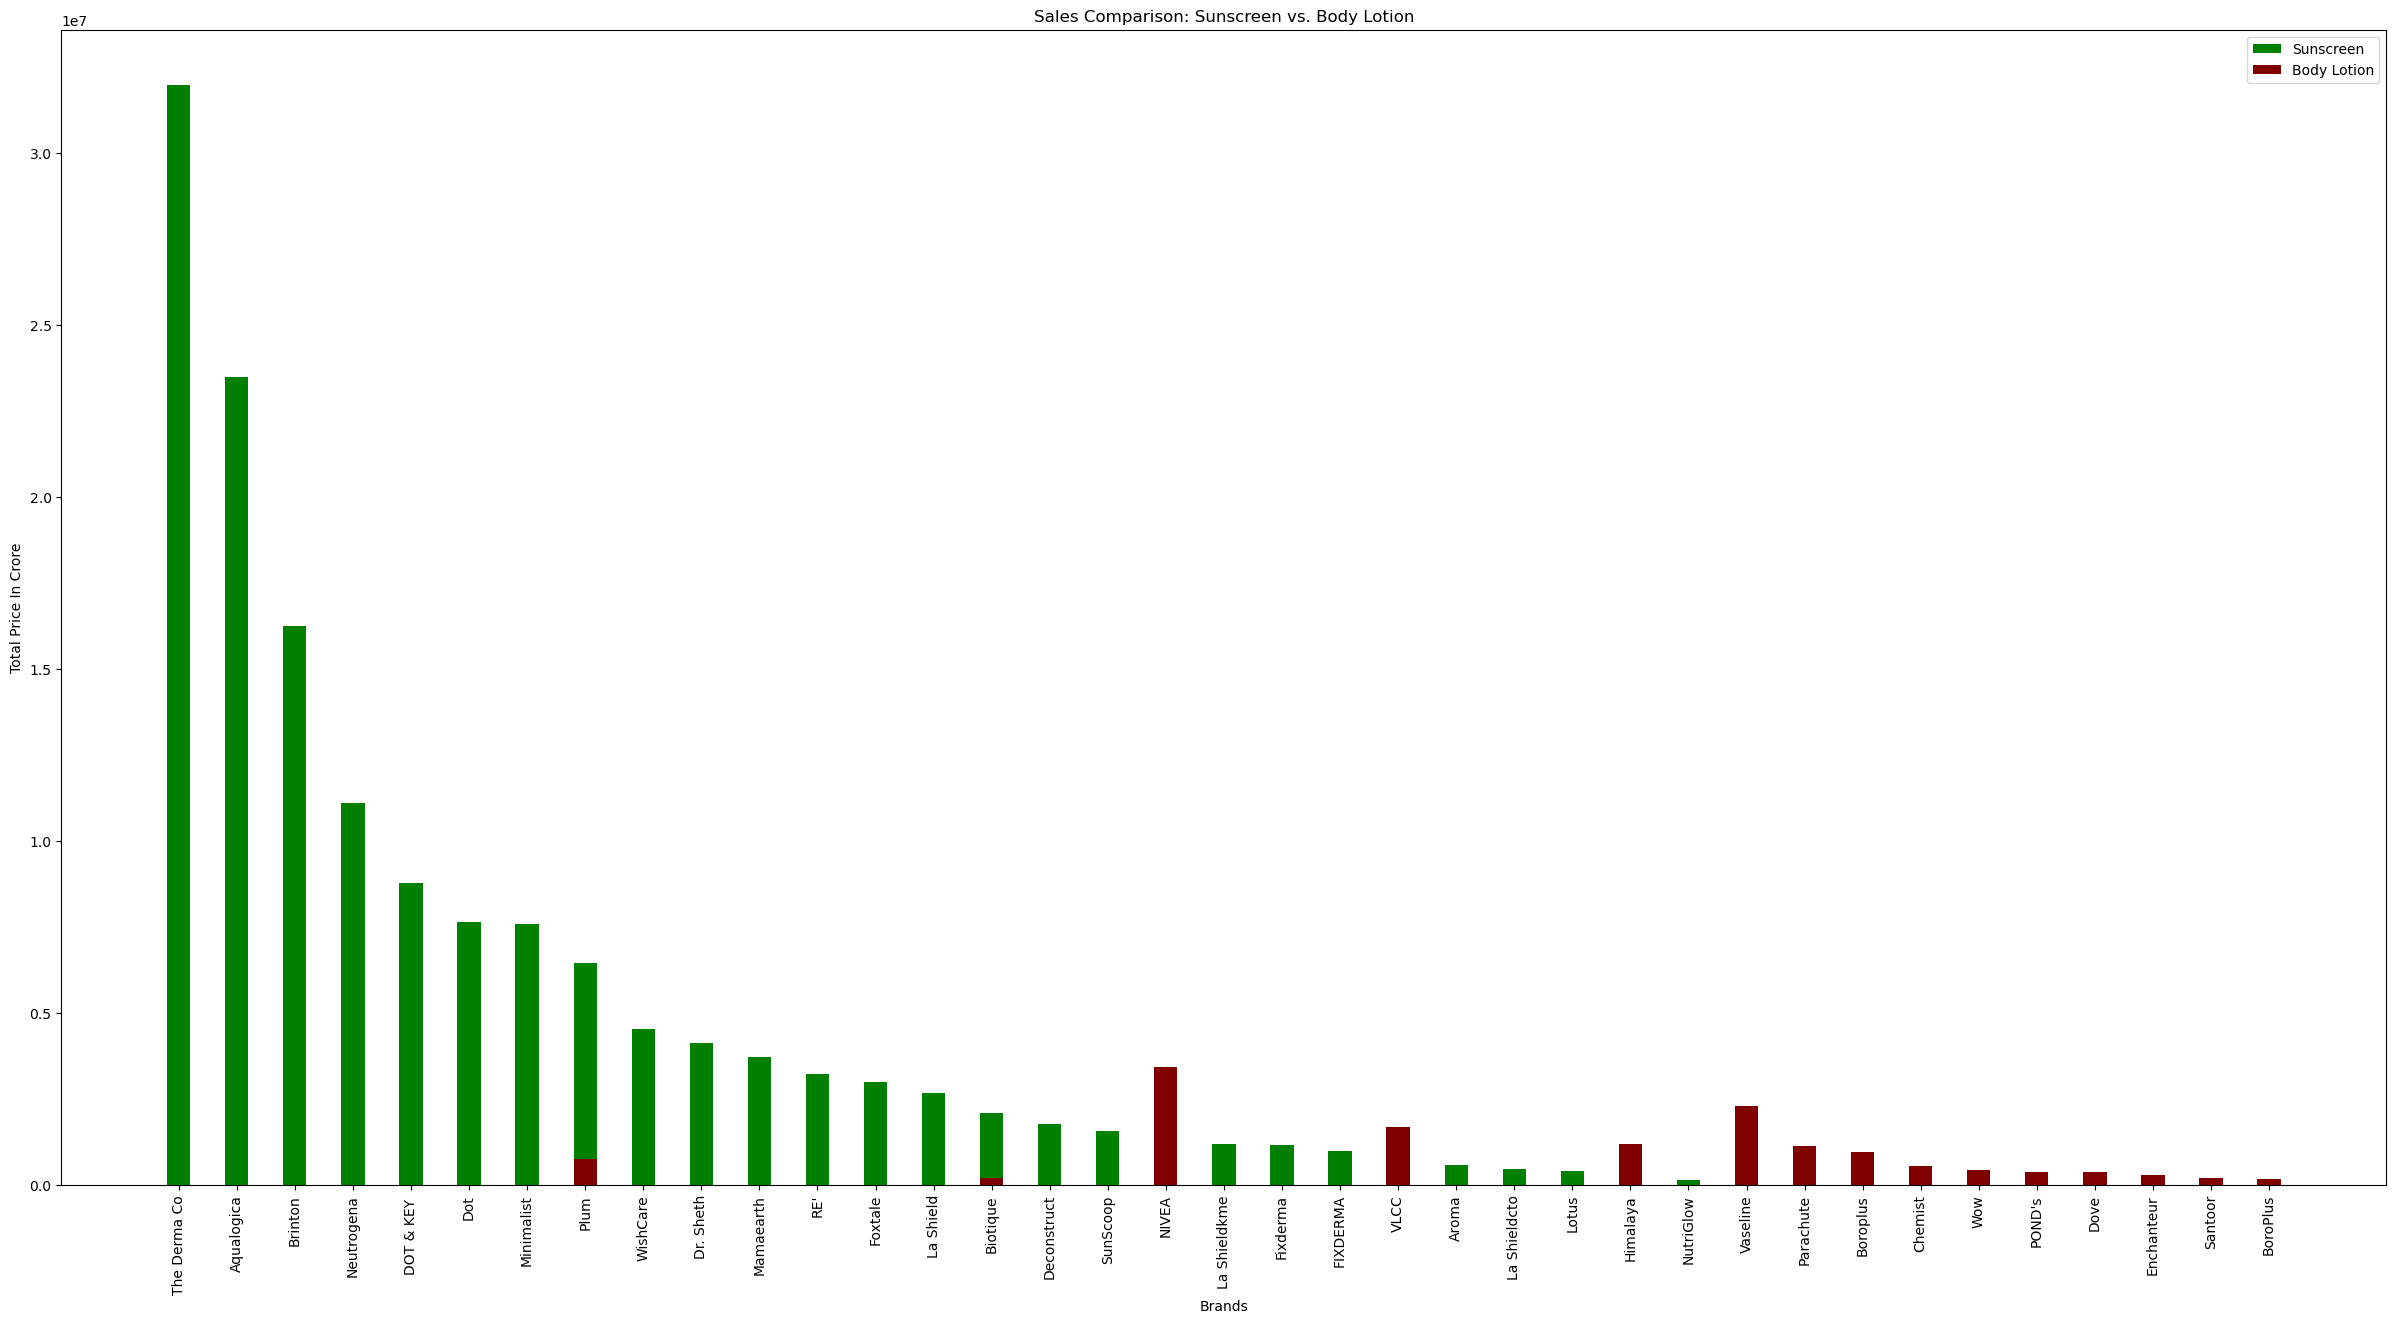

In [135]:
# Create a new figure
fig = plt.figure(figsize=(30, 15))

# Plot the bar chart for sunscreen
plt.bar(sunscreen['Brand_Name'], sunscreen['Value'], color='green', label='Sunscreen', width=0.4)

# Plot the bar chart for lotion
plt.bar(lotion['Brand_Name'], lotion['Value'], color='maroon', label='Body Lotion', width=0.4)

# Add labels and title
plt.xlabel("Brands")
plt.ylabel("Total Price In Crore")
plt.title("Sales Comparison: Sunscreen vs. Body Lotion")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Show the plot
plt.show()
